### Student Performance Indicator

Life Cycle of the Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- Exploratory Data Analysis (EDA)
- Data Pre-Processing
- Model Training
- Choosing the best model

### Problem Statement

- This Projects aims to understand how the student's performance is affected by variables such as Gender,Ethnicity,Parental Education, Lunch and Test Preparation Courses

### 2.1 Importing the data and the Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [5]:
df.shape

(1000, 8)

### 2.2 Dataset Information

- Gender: Sex of Students -> [Male, Female]
- Race/Ethnicity: Ethnicity of Students -> [Group A-E]
- Parental Level of Education: Parent's Maximum Education -> [Bachelor's Degree, Some College, Master's Degree, Associate's Degree, High Scool]
- Lunch: Lunch before Test -> [Standard or Free/reducec]
- Test Preparation Course: Complete or incomplete before the test
- Maths Score
- Reading Score
- Writing Score

### 3. Data Checks to Perform

- Check Missing Values
- Check Duplicates
- Check Data Types
- Check number of unique values of each column
- Check statistics of data set
- Check Various categories present in the different categorical columns

#### 3.1 Check Missing Values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset

#### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

There are no duplicates in the dataset

## 3.3 Checking Data Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values for each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check Statistics of Dataset

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
 - While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

#### 3.7 Exploring Data

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print(f"Categories in 'Gender' variable: {df['gender'].unique()} ")
print(f"Categories in 'race_ethnicity' variable: {df['race_ethnicity'].unique()} ")
print(f"Categories in 'parental level of education' variable: {df['parental_level_of_education'].unique()} ")
print(f"Categories in 'lunch' variable: {df['lunch'].unique()} ")
print(f"Categories in 'test preparation course' variable: {df['test_preparation_course'].unique()} ")

Categories in 'Gender' variable: ['female' 'male'] 
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E'] 
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 
Categories in 'lunch' variable: ['standard' 'free/reduced'] 
Categories in 'test preparation course' variable: ['none' 'completed'] 


In [14]:
# Define numerical and categorical data
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O" ]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print(f"We have {len(numerical_features)} features: {numerical_features}")
print(f"We have {len(categorical_features)} features: {categorical_features}")

We have 3 features: ['math_score', 'reading_score', 'writing_score']
We have 5 features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for Total Score and Average

In [15]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [16]:
df['total_score'] = df['math_score'] + df['writing_score'] + df['reading_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
reading_full = df[df['reading_score']==100]['average_score'].count()
writing_full = df[df['writing_score']==100]['average_score'].count()
maths_full = df[df['math_score']==100]['average_score'].count()

print(f'Number of students with full marks in Maths: {maths_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [21]:
reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()
math_less_20 = df[df['math_score'] <= 20]['average_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Insights

- From above values we get students have performed the worst in Maths
- Best performance is in reading section

### 4. Data Visualization

4.1 Visualizing average score distribution
- Histogram
- Kernel Distribution system

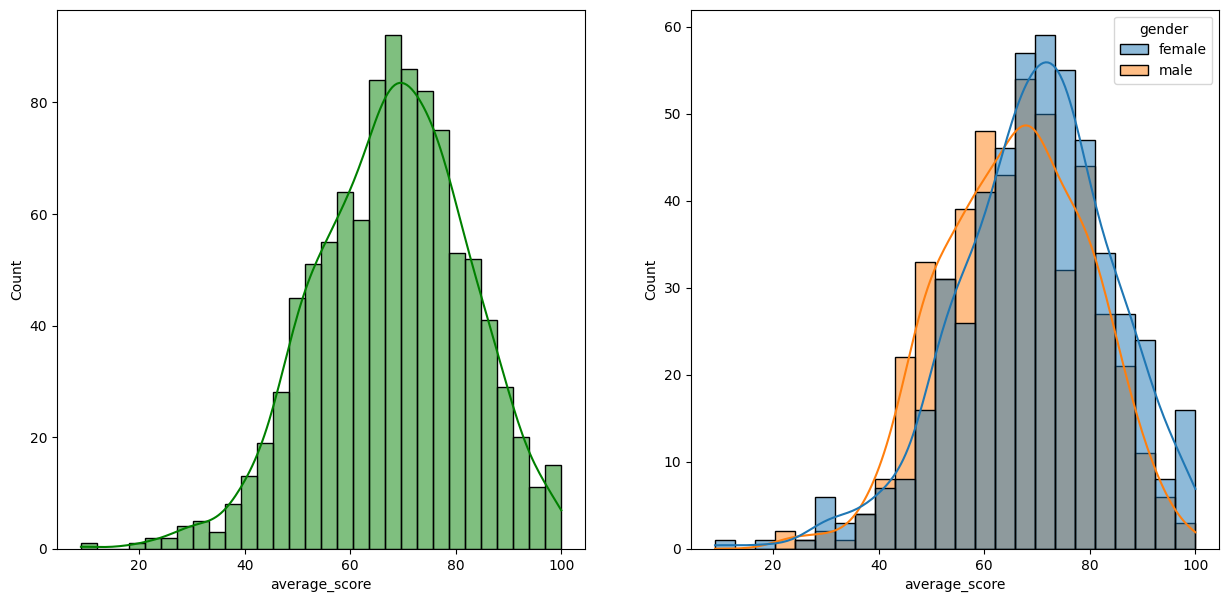

In [27]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

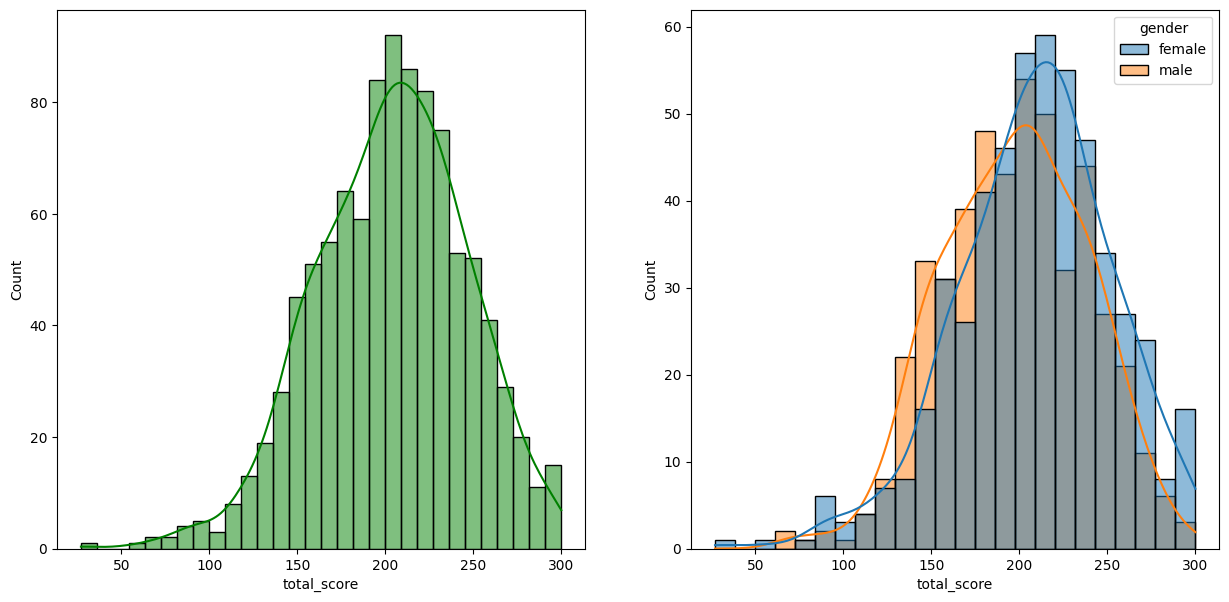

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

- Female students tend to do better than Male Students

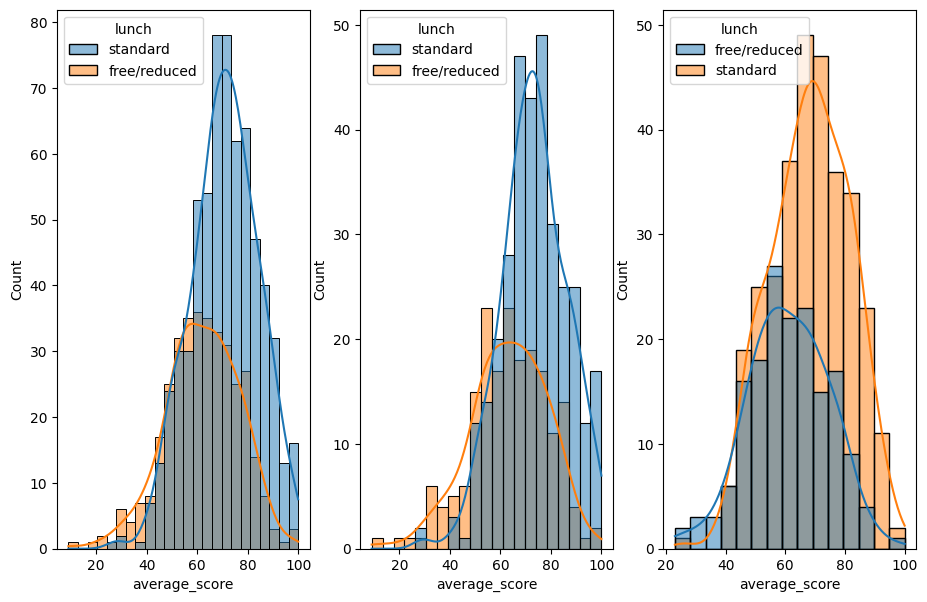

In [33]:
plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

- Standard Lunch helps perform better irrespective of the gender

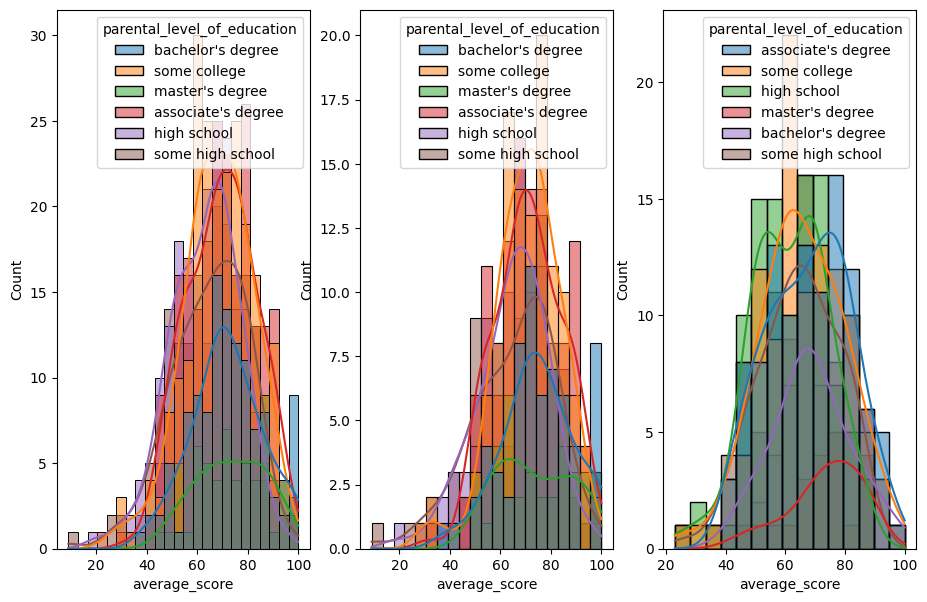

In [34]:
plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

- Generally Parent's education doesn't help children perform well in exams
- Parents who have an associate's or master degreee: Their male child tends to perform well in exams
- No effect of Parent's education on Female students

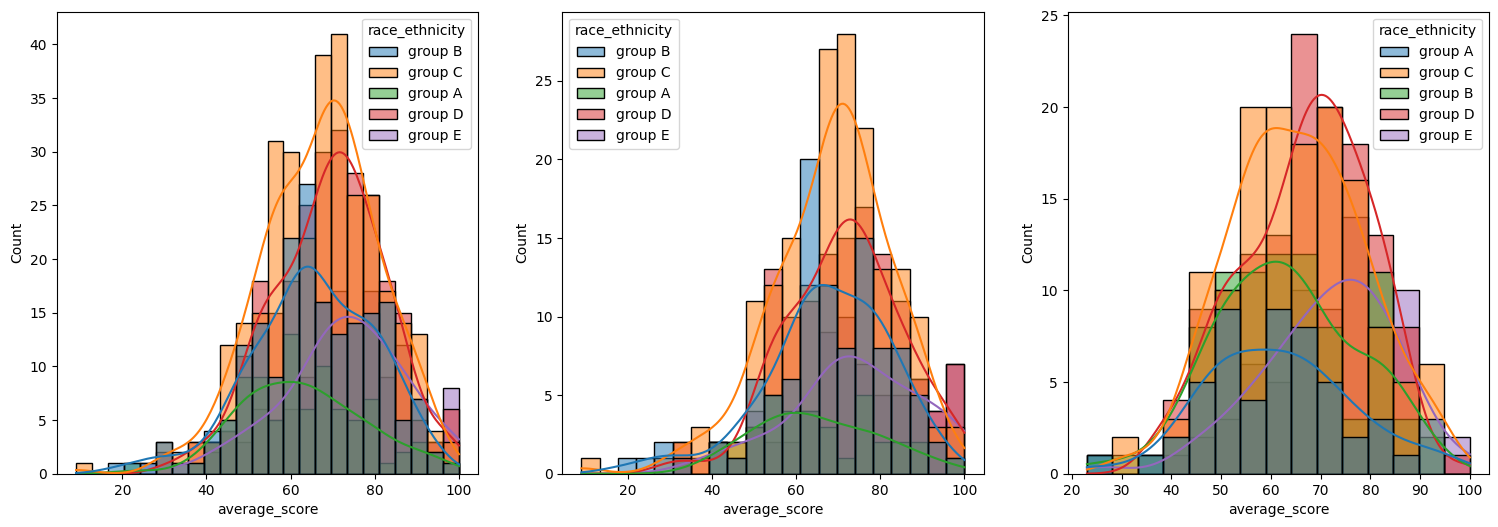

In [38]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

- Students of Group A and B tend to perform poorly in exams irrespective of Gender

### 4.2 Maximum score of students in all 3 Subjects

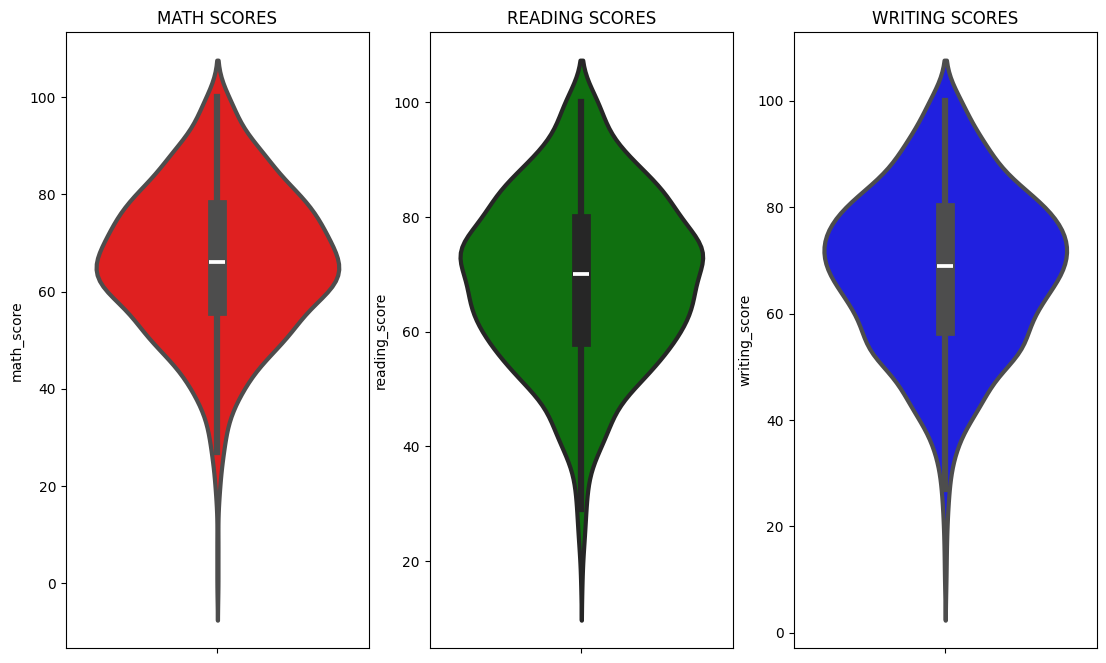

In [39]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

- Most of the students score in between 60-80 in Maths whereas in Reading and Writing that socre is in the range 50-80

### 4.3 Multivariate Analysis using Pieplot

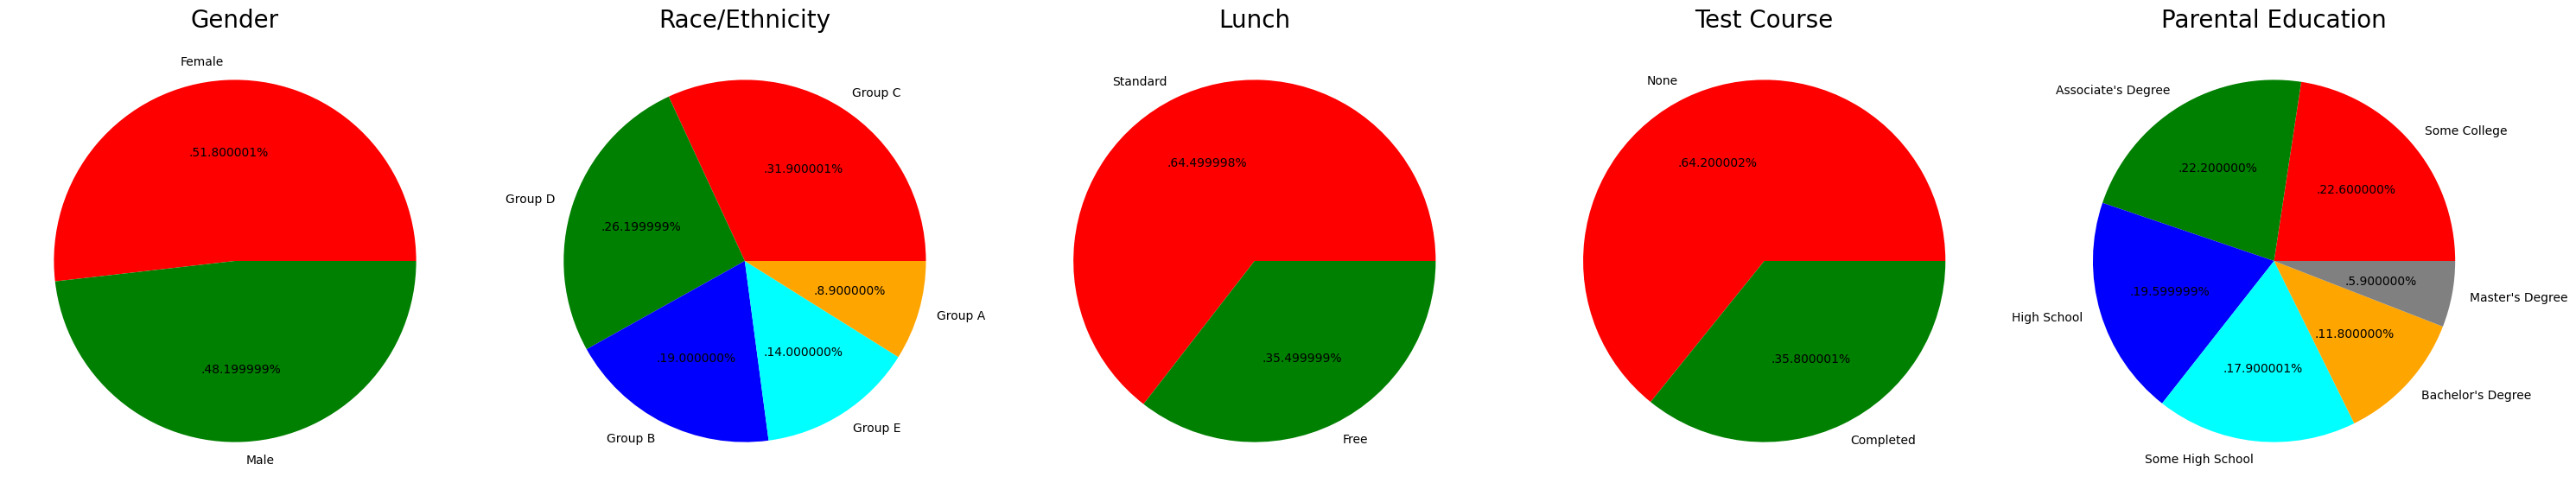

In [45]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels='Female','Male'
color = 'Red', 'Green'

plt.pie(size,colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')



plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')




plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insights

- Number of Male and Female students are almost equal
- Group C is the largest
- Number of students having standard lunch are greater
- Number of students who have not enrolled in any test preparation course is high
- Number of Students having Parental Education as "Some College" is greatest followed by "Associate's Degree"

##### 4.4 Feature Wise Visualization

#### 4.4.1 Gender

- How is Gender distributed?
- Does gender have any impact on student's performances?

### Univariate Analysis (How is Gender Distributed?)

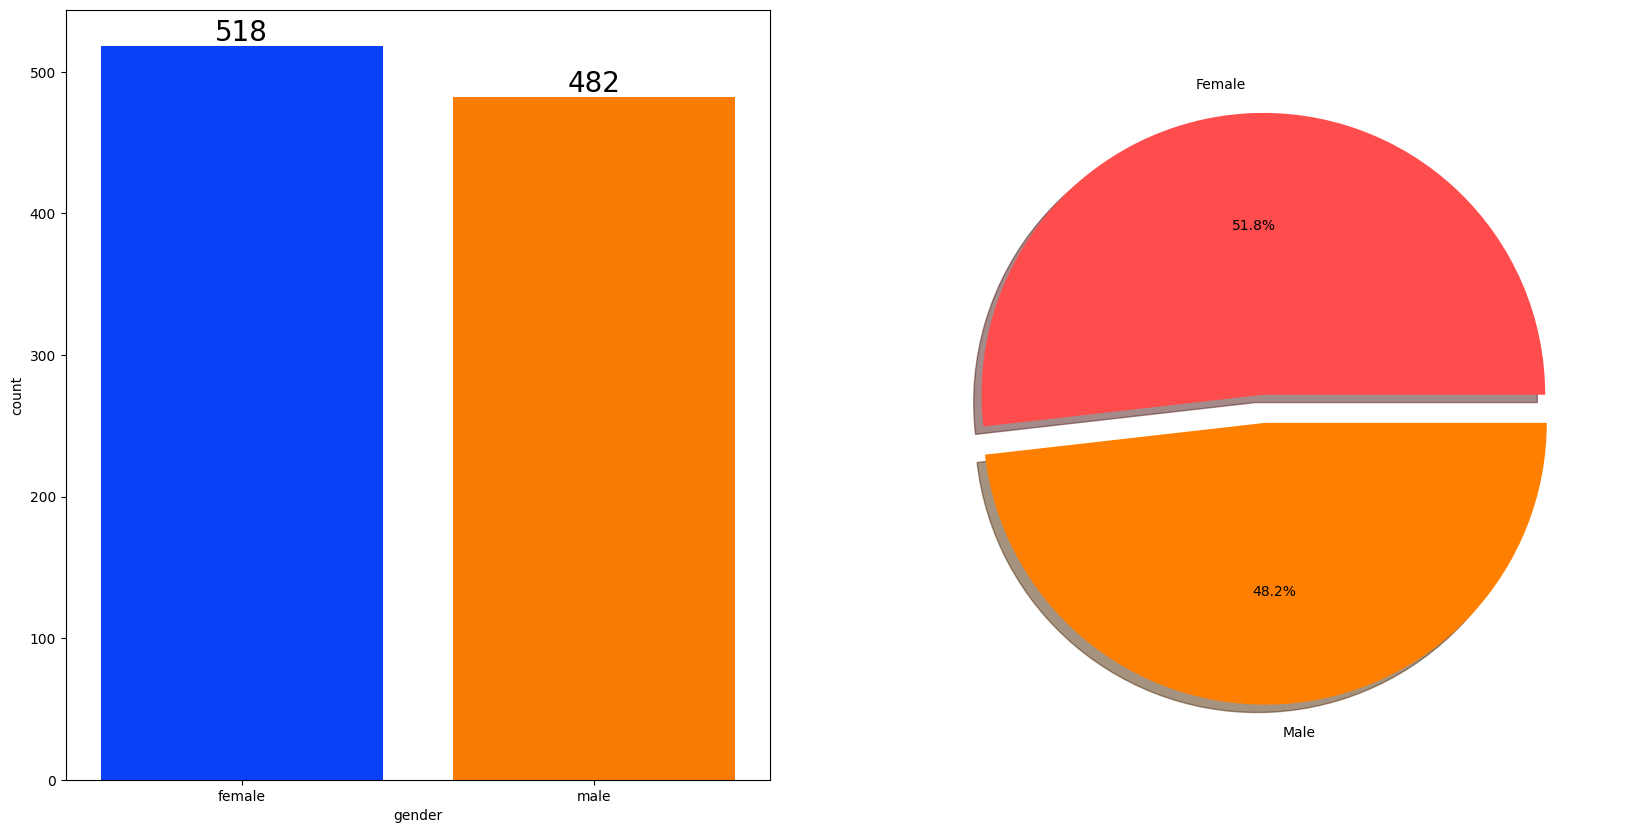

In [47]:
fig, axs = plt.subplots(1,2, figsize = (20,10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=axs[0], saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

- Gender has balanced data with 518 Female Students (52%) and 482 Male Students (48%)

#### Bivariate Analysis (Does Gender have any impact on student's perforamce?)

In [51]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [59]:
gender_group['average_score']

gender
female    69.569498
male      65.837483
Name: average_score, dtype: float64

In [60]:
gender_group['math_score']

gender
female    63.633205
male      68.728216
Name: math_score, dtype: float64

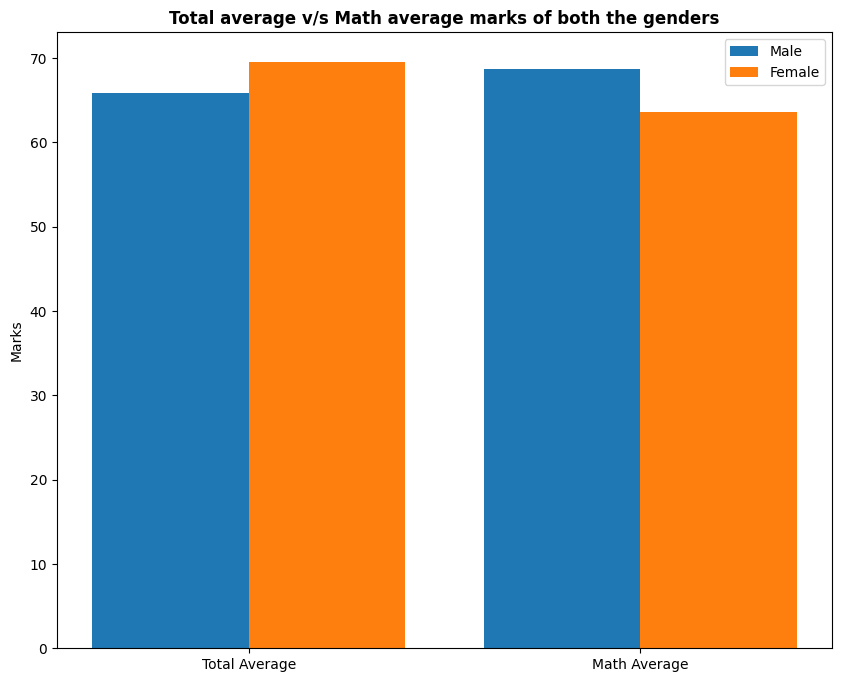

In [54]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

- Females have a better overall average than Male Students
- Males have a better average in Maths

### 4.4.2 Race/Ethnicity Column
- How is groupwise distribution?
- Does race/ethnicity have any impact on a student's performance?

Univariate Analysis (How is groupwise distribution?)

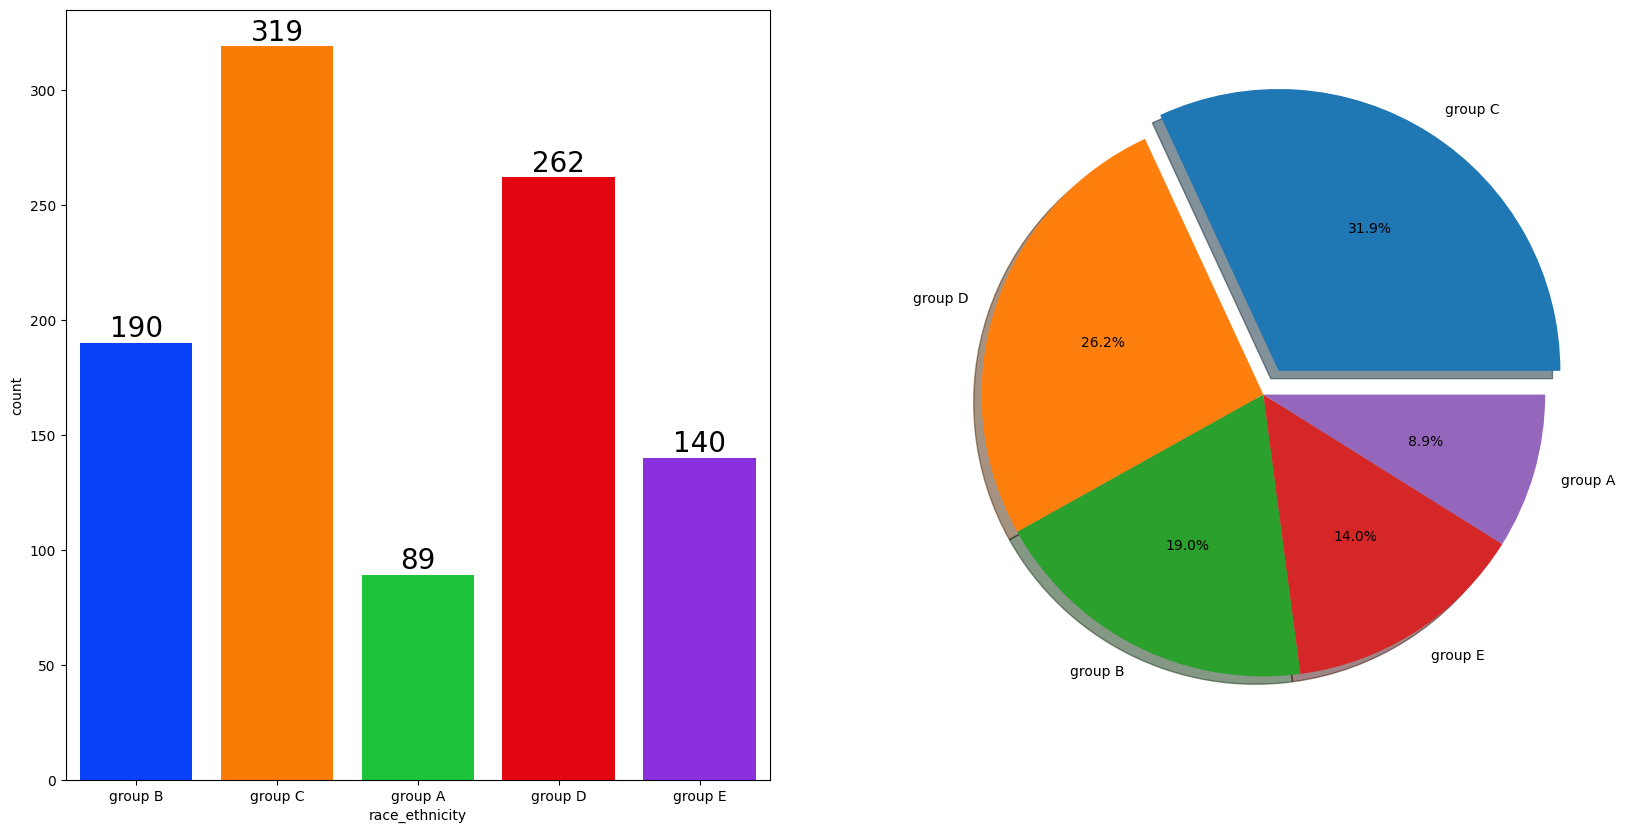

In [61]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

- Most of the students belong from Group C
- Group A has the minimum number of students

Bivariate Analysis (Does Race/Ethnicity have any impact on a student's performace?)

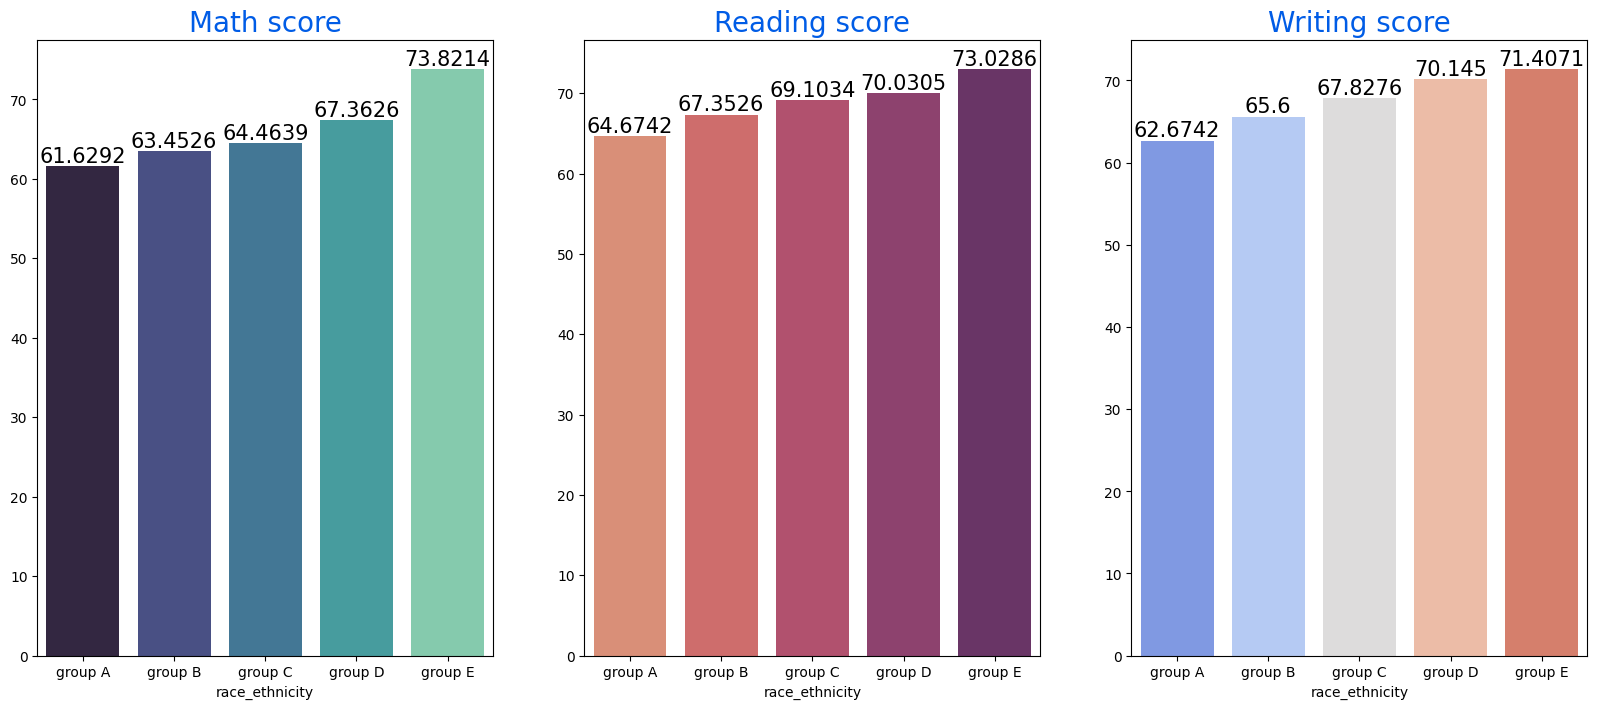

In [62]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

- Group E students score the highest
- Group A students score the lowest
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 Parental Level of Education Column
- What is the educational background of a parent?
- Does it have any impact on the student's performance?

Univariate Analysis (What is educational background of parent?)

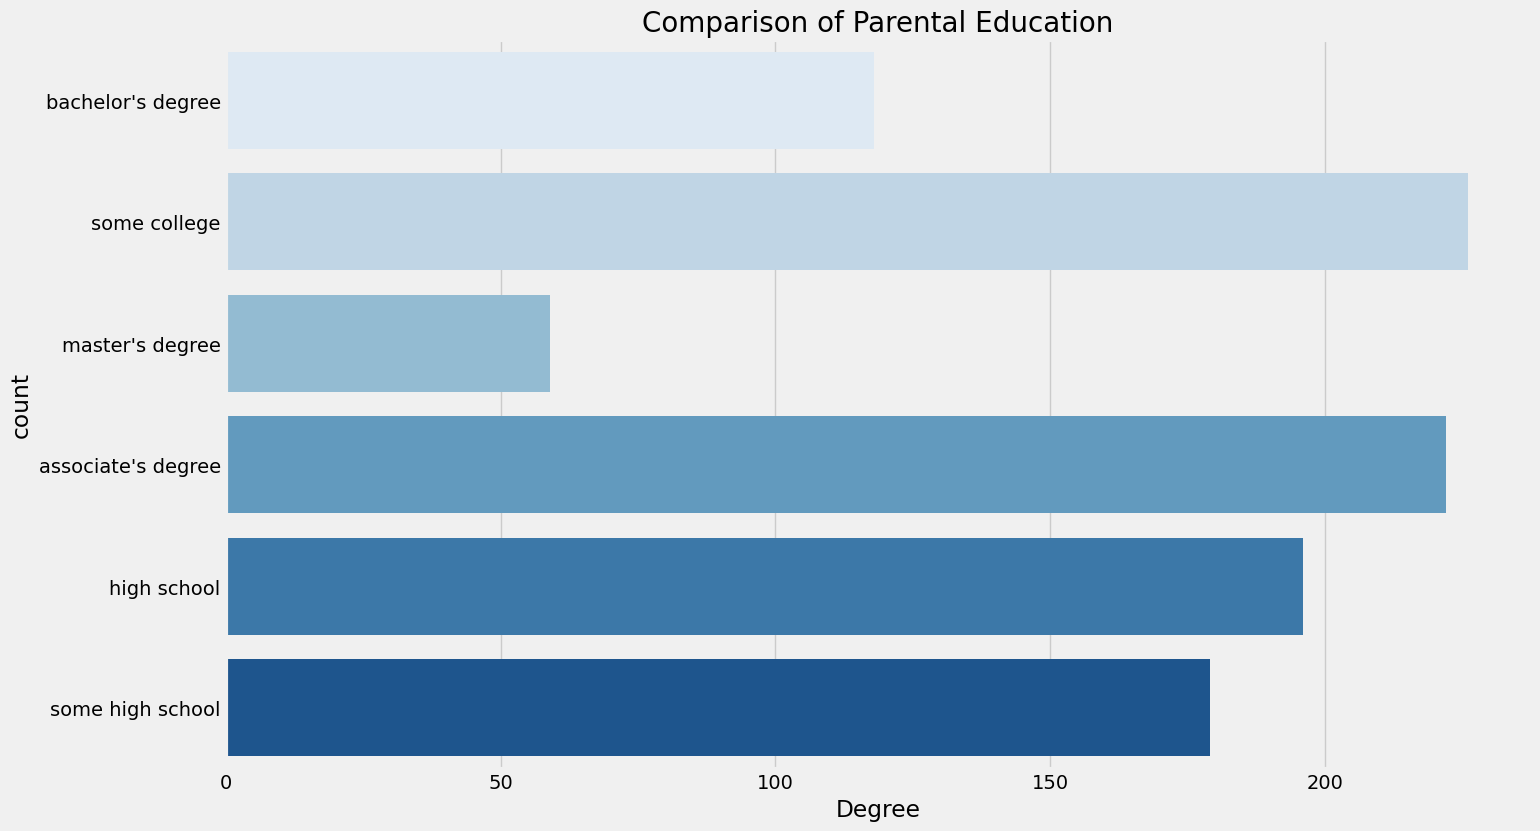

In [66]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

- Largest number of parents are from "Some College"

Bivariate Analysis (Does it have an impact on the student's performance?)

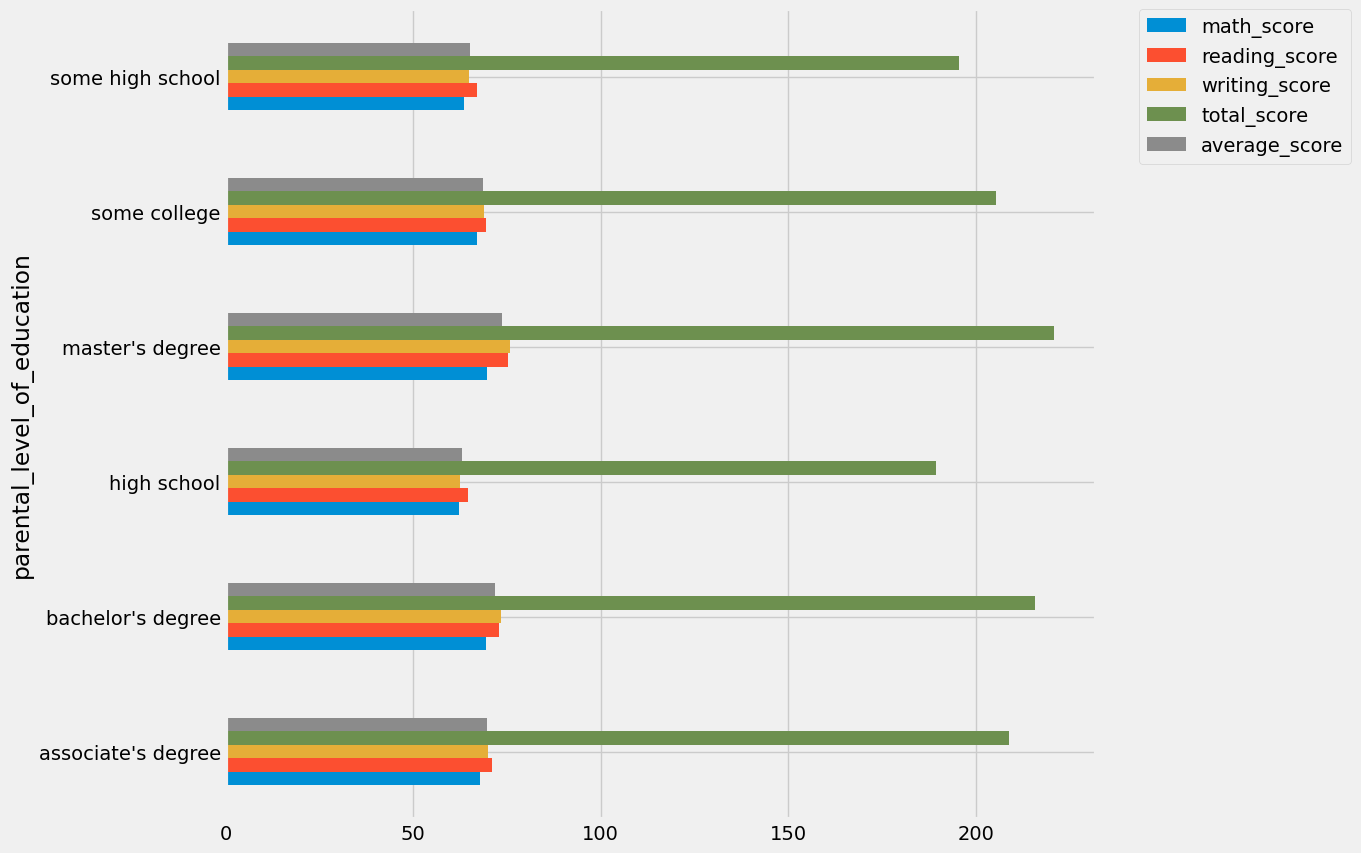

In [69]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

- Students having Parents with a Bachelor's or Master's Degree tend to score more

#### 4.4.4 Lunch Column

- Which type of lunch is most common among students?
- What is the effect of lunch type of results?

Univariate Analysis (Which type of lunch is the most common?)

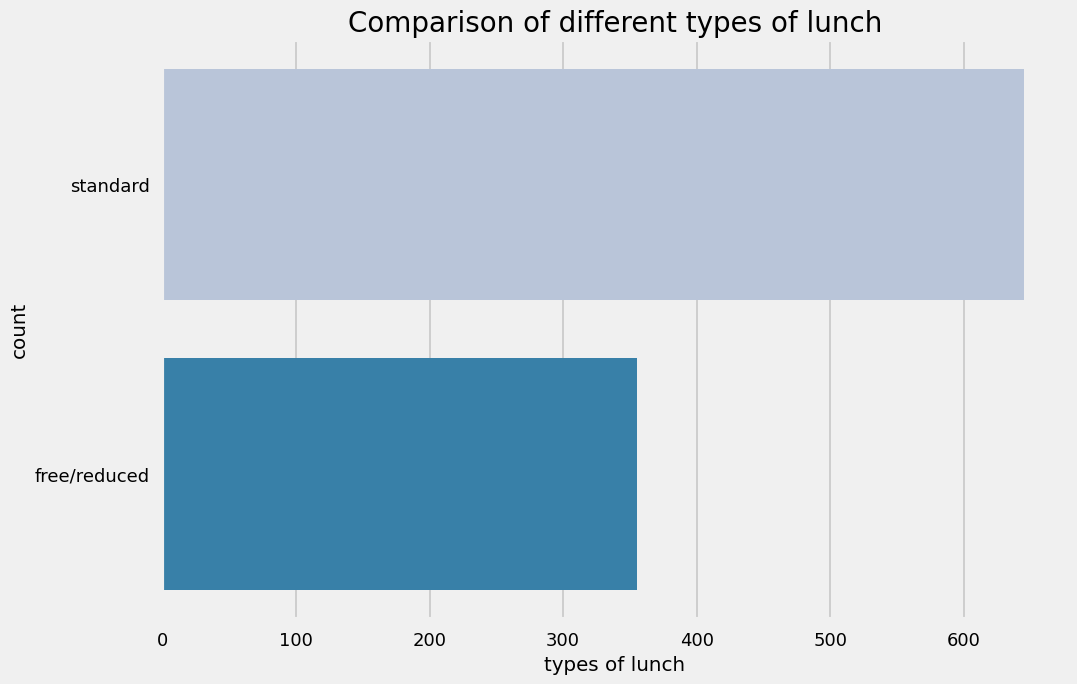

In [70]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

- Standard Lunch is more common than Free/Reduced Lunch

Bivariate Analysis (Does Lunch type impact the student's performance?)

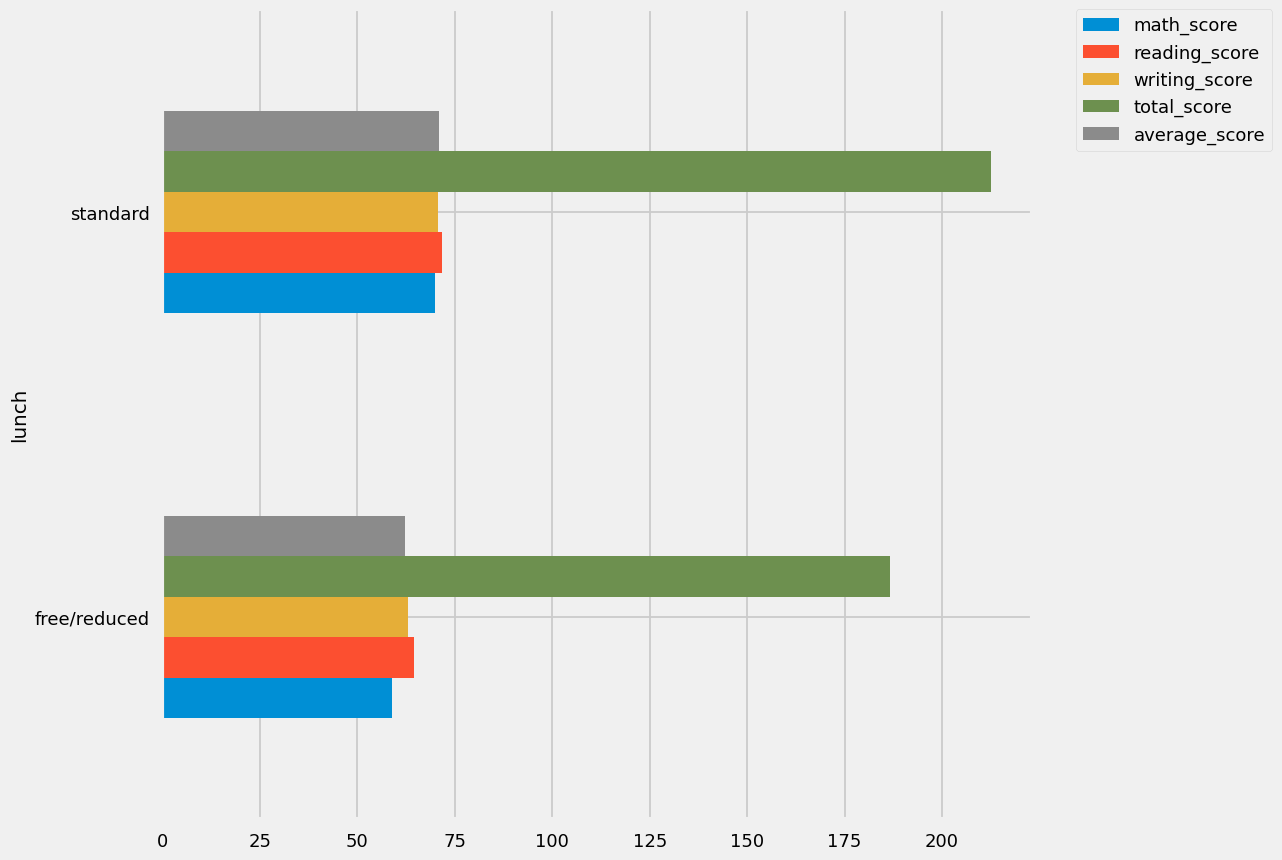

In [71]:
df.groupby('lunch').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

- Students having standard lunch tend to score more

#### 4.4.5 TEST PREPARATION COURSE COLUMN
- How many students complete the test preparation course (Distribution)?
- Does it have an impact on the student's scores?

Univariate Analysis (How many students complete the test preparation course (Distribution)?)

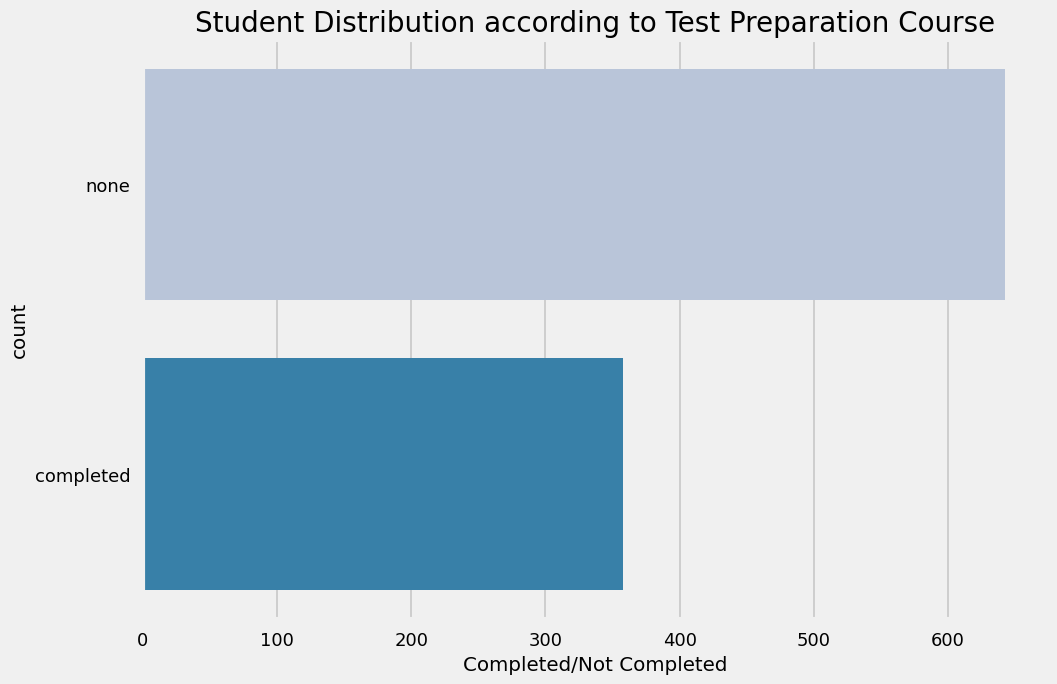

In [74]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['test_preparation_course'], palette = 'PuBu')
plt.title('Student Distribution according to Test Preparation Course', fontweight = 30, fontsize = 20)
plt.xlabel('Completed/Not Completed')
plt.ylabel('count')
plt.show()

- The number of students who did not complete the Test Preparation Course is greater than the student who did it

Bivariate Analysis (Does it have any impact on the student's performance?)

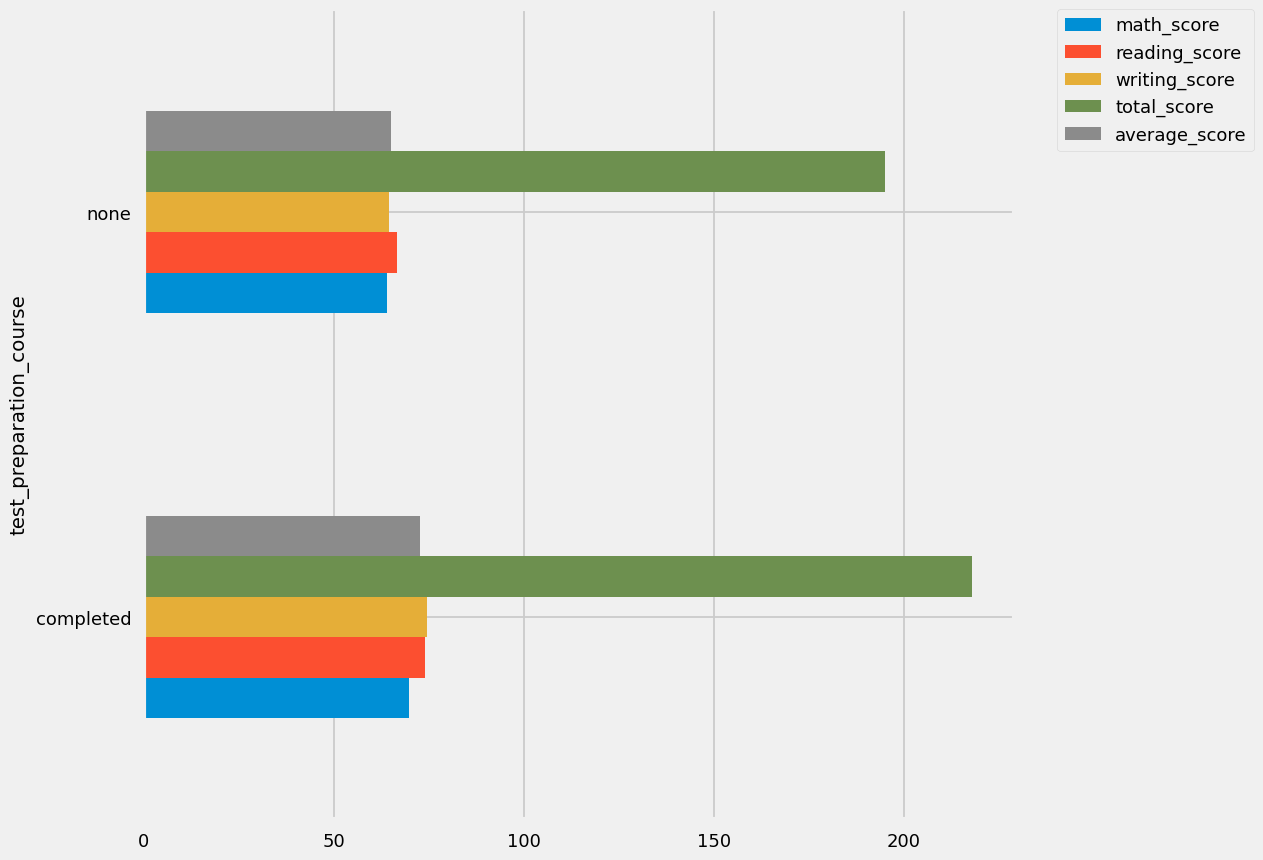

In [75]:
df.groupby('test_preparation_course').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

- Those who completed the Test Preparation Course have scored higher compared to the students who didn't